<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

import sys
sys.path.append("../")

# Importamos nuestras funciones
# -----------------------------------------------------------------------
from src import soporte_ajuste_logistica as sal

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle("../data/financial_data_clean.pkl")
df.head()

,is_fraudulent,card_type,location,transaction_description,customer_id,merchant_id,amount,customer_age,purchase_category_Gas Station,purchase_category_Groceries,purchase_category_Online Shopping,purchase_category_Restaurant,purchase_category_Retail,purchase_category_Travel
0,0.0,0.521611,0.497382,0.517856,0.60,-0.450980,0.160961,-0.038462,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.507631,0.529126,0.536825,-0.74,0.058824,-0.601127,0.653846,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.521611,0.600000,0.506026,-0.96,-0.294118,-0.730090,0.500000,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.504747,0.600000,0.525765,0.86,-0.254902,0.528558,0.576923,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.521611,0.497382,0.523806,-0.32,0.647059,-0.603391,-0.307692,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados.head()

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.54975,0.549677,0.54975,0.549559,0.099178,0.568046,0.002999,8.0,NaN,NaN
test,0.56950,0.569271,0.56950,0.569344,0.137504,0.587339,NaN,NaN,0.002999,8.0


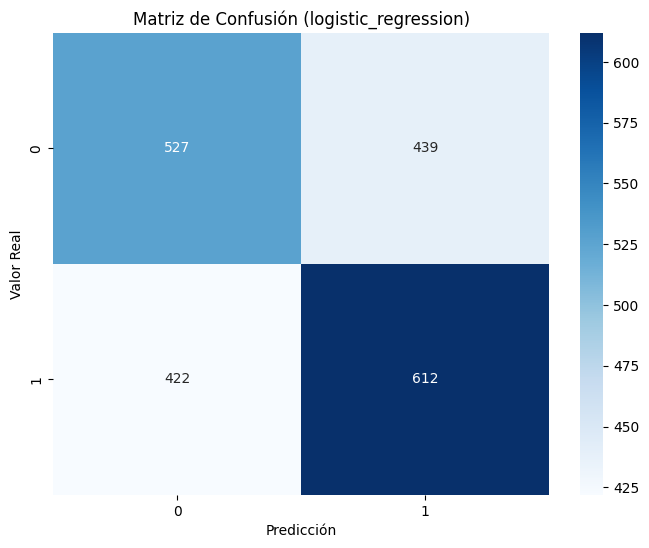

In [4]:
logistica.plot_matriz_confusion("logistic_regression")

In [5]:
# llamamos al método para calcular las métricas del modelo
logistica.calcular_metricas("logistic_regression")

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.54975,0.549677,0.54975,0.549559,0.099178,0.568046,0.006982,8.0,NaN,NaN
test,0.56950,0.569271,0.56950,0.569344,0.137504,0.587339,NaN,NaN,0.006982,8.0


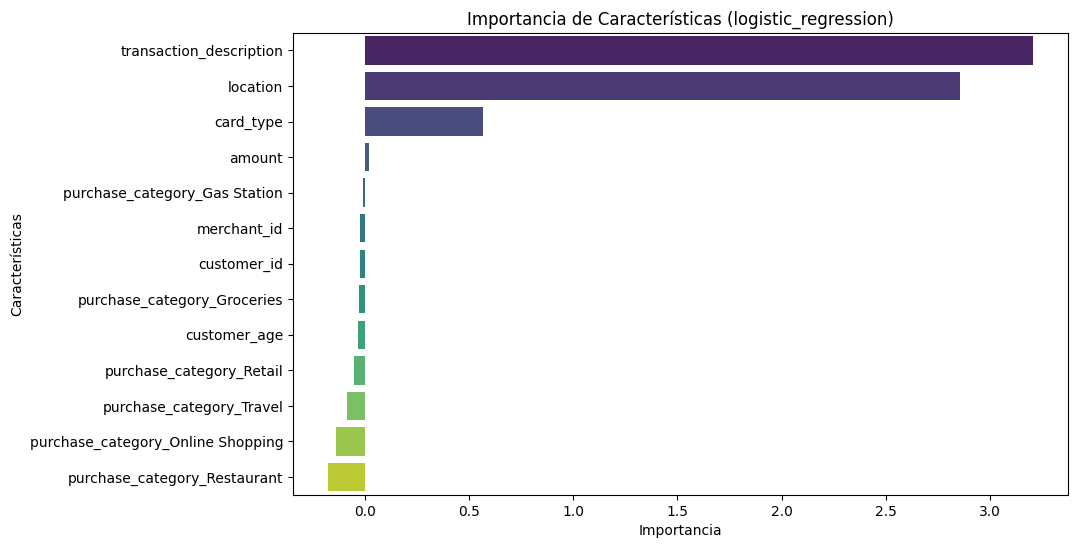

In [6]:
# Mostramos la importancia de los predictores en el modelo regresión logística
logistica.importancia_predictores(modelo_nombre ='logistic_regression')